## Logistic regression

- accuracy score = **0.9197**
- log loss = **0.3007** 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, log_loss
import warnings
warnings.filterwarnings('ignore')

In [2]:
digit_df = pd.read_csv('full_mnist_digits.csv')

In [4]:
X = digit_df.drop('label',axis=1)

In [5]:
y = digit_df['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=23, stratify=y)

###  Building the model

In [7]:
lr = LogisticRegression()

In [40]:
lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred = lr.predict(X_test)

###  Accuracy score

In [27]:
y_pred_proba = lr.predict_proba(X_test)

In [41]:
loss = log_loss(y_test,y_pred_proba)
loss

0.30077781313114377

In [42]:
score  = accuracy_score(y_test,y_pred)
score

0.9197222222222222

###  Classification report

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1777
           1       0.96      0.97      0.96      2023
           2       0.90      0.89      0.89      1787
           3       0.90      0.88      0.89      1839
           4       0.92      0.92      0.92      1753
           5       0.89      0.86      0.88      1626
           6       0.93      0.96      0.95      1775
           7       0.95      0.93      0.94      1880
           8       0.87      0.88      0.88      1755
           9       0.90      0.91      0.91      1785

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000



###  Confusion matrix

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1712    0   13    3    3   16   14    3   13    0]
 [   0 1970   12    7    2    4    1    5   17    5]
 [  19   23 1592   33   18    7   23   16   51    5]
 [  13    8   44 1619    2   58    9   16   48   22]
 [   4   10   19    3 1618    6   21    5   10   57]
 [  12    6   10   65   23 1405   40    6   46   13]
 [  15    1   22    0   12   13 1704    0    7    1]
 [   2    8   27   12    9    3    2 1755    7   55]
 [  12   32   24   37    5   55   16    2 1552   20]
 [   6    4    8   13   59    8    0   36   23 1628]]


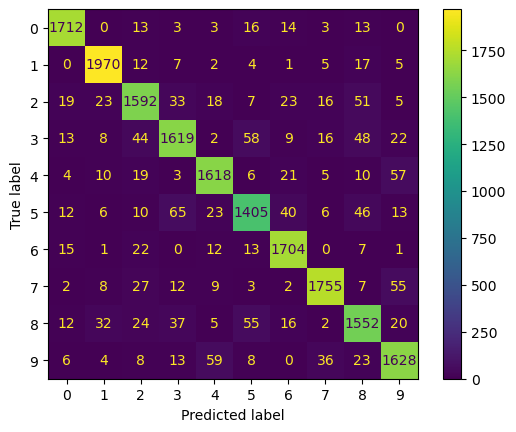

In [25]:
vis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
vis.plot()
plt.show()